In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
home_dir = os.path.expanduser("~")
file_path = os.path.join(home_dir,"Documents", "Summer_Work", "P2_Regression", "Data", "forestfires.xlsx")

df = pd.read_excel(file_path)
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
## Plotting a simple regression line ##

Intercept (beta_0): 109.28754541729779
Coefficient (beta_1): -2.7589712894977416
The equation of the regression line is: y = 109.28754541729779 + -2.7589712894977416x
R^2: 0.8428063287863298


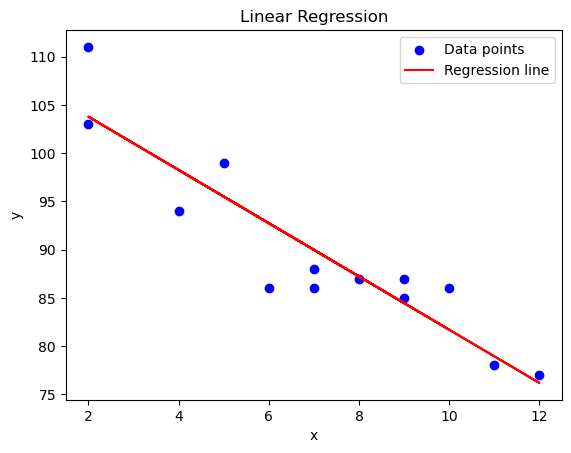

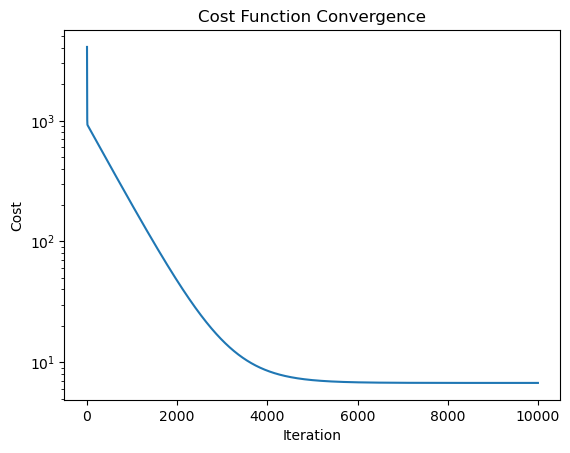

In [58]:


x = np.array([5,7,8,7,2,10,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

# start with the parameters for the intercept (beta_0) and the slope (beta_1)
beta_0 = 0
beta_1 = 0

# next define the Hyperparameters, learning rate (How big of a jump down the gradient you take) 
# and the number of iterations (how many times you change the parameters).
learning_rate = 0.005
num_iterations = 10000

#number of data points
m = len(y)
cost_history = []

# Gradient descent
for _ in range(num_iterations):
    # Compute predictions
    y_pred = beta_0 + beta_1 * x
    
    # Compute the cost
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    cost_history.append(cost)
   
    
    # Compute gradients
    gradient_0 = (1 / m) * np.sum(y_pred - y)
    gradient_1 = (1 / m) * np.sum((y_pred - y) * x)
    
    # Update parameters
    beta_0 -= learning_rate * gradient_0
    beta_1 -= learning_rate * gradient_1

# Final parameters
print(f'Intercept (beta_0): {beta_0}')
print(f'Coefficient (beta_1): {beta_1}')

#regression line

print(f'The equation of the regression line is: y = {beta_0} + {beta_1}x')

# Compute R^2
y_pred = beta_0 + beta_1 * x
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f'R^2: {r_squared}')

# Plot the data and the regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, beta_0 + beta_1 * x, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Cost Function Convergence')
plt.show()


In [51]:
# try it out. try and predict a data point...
when_x = 8
y = beta_0 + beta_1 * when_x
print(y.round(3))
# Yeh so pretty good prediction

87.117


In [28]:
### Regression for more than one feature, does it change? ###

Intercept (beta_0): 102.83011612944954
Coefficient (beta_1): -0.9429867250862521
Coefficient (beta_2): -2.440221129347311
The equation of the regression line is: y = 102.83011612944954 + -0.9429867250862521x1 + -2.440221129347311x2


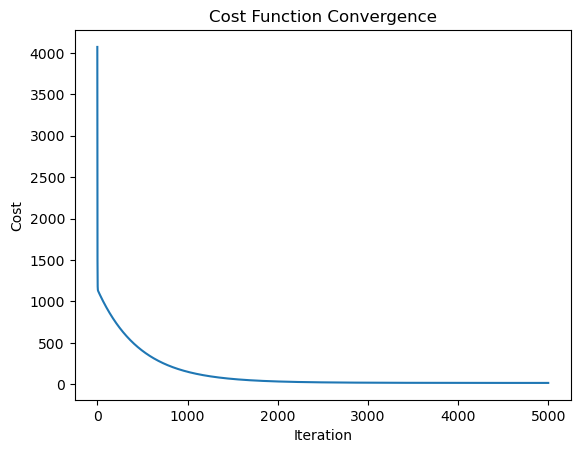

In [52]:
import numpy as np

# Sample data with two features
feature_1 = np.array([5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6])
feature_2 = np.array([1, 2, 3, 2, 1, 5, 1, 3, 1, 4, 4, 3, 2])
y = np.array([99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86])

# Combine the features into a single matrix X (not relevant for this method)
X = np.vstack((feature_1, feature_2)).T

## Just going to try with the old method
# start with the parameters for the intercept (beta_0) and the slope (beta_1)
beta_0 = 0
beta_1 = 0
beta_2 = 0

# next define the Hyperparameters, learning rate (How big of a jump down the gradient you take) 
# and the number of iterations (how many times you change the parameters).
learning_rate = 0.005
num_iterations = 5000

m = len(y)
cost_history = []

# Gradient descent
for _ in range(num_iterations):
    # Compute predictions
    y_pred = beta_0 + beta_1 * feature_1 + beta_2 * feature_2
    
    # Compute the cost
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    cost_history.append(cost)
    
    # Compute gradients
    gradient_0 = (1 / m) * np.sum(y_pred - y)
    gradient_1 = (1 / m) * np.sum((y_pred - y) * feature_1)
    gradient_2 = (1 / m) * np.sum((y_pred - y) * feature_2)
    
    # Update parameters
    beta_0 -= learning_rate * gradient_0
    beta_1 -= learning_rate * gradient_1
    beta_2 -= learning_rate * gradient_2

# Final parameters
print(f'Intercept (beta_0): {beta_0}')
print(f'Coefficient (beta_1): {beta_1}')
print(f'Coefficient (beta_2): {beta_2}')


#regression line

print(f'The equation of the regression line is: y = {beta_0} + {beta_1}x1 + {beta_2}x2')

# Compute R^2
#y_pred = beta_0 + beta_1 * x
#ss_total = np.sum((y - np.mean(y)) ** 2)
#ss_residual = np.sum((y - y_pred) ** 2)
#r_squared = 1 - (ss_residual / ss_total)

#print(f'R^2: {r_squared}')

# Plot the data and the regression line


plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

In [54]:
# lets see if our model predicts pretty well?
y = beta_0 + beta_1 * feature_1[0] + beta_2 * feature_2[0]
y
# yeh so relatively good

95.67496137467097

In [ ]:
## we can improve the writing for the code using vectorization ##